In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import time
import random

In [42]:
df = pd.read_csv("IRIS.csv") 
df = df.dropna()
X = df.drop(columns = ['species']).values

In [29]:
kmeans = KMeans(n_clusters=3, max_iter=50)
y_kmeans = kmeans.fit_predict(X)

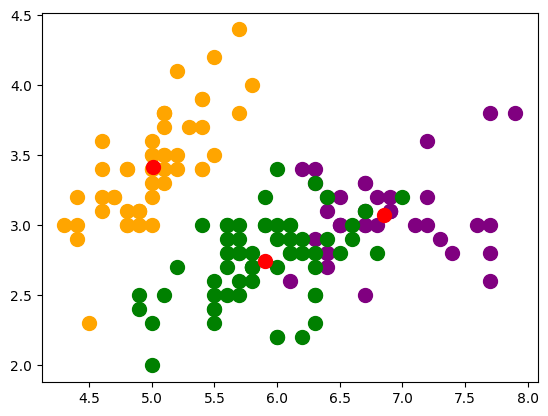

In [35]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red')
plt.show()

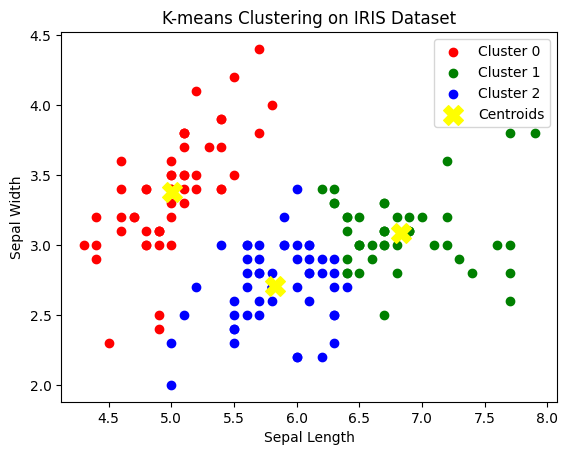

In [ ]:
def getRandomCentroids(data, k): 
    return random.sample(list(data), k)

def assignToClusters(data, centroids): 
    cluster_assignments = [] 
    for point in data: 
        closest_centroid = findClosestCentroid(point, centroids) 
        cluster_assignments.append(closest_centroid) 
    return cluster_assignments 

def findClosestCentroid(point, centroids): 
    distances = [distanceFunction(point, centroid) for centroid in centroids] 
    return np.argmin(distances) 

def distanceFunction(point, centroid):
    return np.sqrt((point[0]-centroid[0])**2 + (point[1]-centroid[1])**2)

def updateCentroids(data, cluster_assignments, k): 
    new_centroids = [] 
    for cluster in range(k): 
        cluster_points = getPointsInCluster(cluster, cluster_assignments, data) 
        if len(cluster_points) > 0:
            new_centroids.append(np.mean(cluster_points, axis=0)) 
        else:
            new_centroids.append(random.choice(data))  
    return new_centroids 

def getPointsInCluster(cluster, cluster_assignments, data): 
    cluster_points = [] 
    for i, assignment in enumerate(cluster_assignments): 
        if assignment == cluster: 
            cluster_points.append(data[i]) 
    return cluster_points 

def kmeans(data, k, max_iter): 
    centroids = getRandomCentroids(data, k) 
    for i in range(max_iter): 
        cluster_assignments = assignToClusters(data, centroids)  
        centroids = updateCentroids(data, cluster_assignments, k) 
    return centroids, cluster_assignments



centroids, cluster_assignments = kmeans(data, k=3, max_iter=20)

# --- Visualization ---
colors = ['r','g','b']
for i in range(3):
    cluster_points = np.array(getPointsInCluster(i, cluster_assignments, data))
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[i], label=f'Cluster {i}')

centroids = np.array(centroids)
plt.scatter(centroids[:,0], centroids[:,1], c='yellow', marker='X', s=200, label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering on IRIS Dataset')
plt.legend()
plt.show()
